# Import Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import copy
import warnings
warnings.filterwarnings('ignore')

In [3]:
from load_models import *
from syngem_utils import *

In [4]:
torch.manual_seed(21)
np.random.seed(21)

# Load models

In [5]:
gem_model_50_21 = load_gemini_fc_50_sparsity_seed_21()
gem_model_50_42 = load_gemini_fc_50_sparsity_seed_42()
gem_model_50_63 = load_gemini_fc_50_sparsity_seed_63()

=> Reading YAML config from Configs/hypercube/resnet20/resnet20_quantized_iter_hc_target_sparsity_1_4_highreg.yml
=> Reading YAML config from Configs/synflow_fc.yml


In [6]:
syn_model_50_21 = load_synflow_fc_sparsity_50_seed_21()
syn_model_50_42 = load_synflow_fc_sparsity_50_seed_42()
syn_model_50_63 = load_synflow_fc_sparsity_50_seed_63()

In [7]:
rnd_model_50_21 = load_random_fc_sparsity_50_seed_21()
rnd_model_50_42 = load_random_fc_sparsity_50_seed_42()
rnd_model_50_63 = load_random_fc_sparsity_50_seed_63()

# Structural Analysis

### Get sparsities

In [8]:
sprse_gem_50_21 = check_sparsity(gem_model_50_21, single = True)
sprse_gem_50_42 = check_sparsity(gem_model_50_42, single = True)
sprse_gem_50_63 = check_sparsity(gem_model_50_63, single = True)

In [9]:
sprse_syn_50_21 = check_sparsity(syn_model_50_21, single = True)
sprse_syn_50_42 = check_sparsity(syn_model_50_42, single = True)
sprse_syn_50_63 = check_sparsity(syn_model_50_63, single = True)

In [10]:
sprse_rnd_50_21 = check_sparsity(rnd_model_50_21, single = True)
sprse_rnd_50_42 = check_sparsity(rnd_model_50_42, single = True)
sprse_rnd_50_63 = check_sparsity(rnd_model_50_63, single = True)

### Sparsity tables

In [11]:
table = make_table(sprse_gem_50_21, sprse_gem_50_42, sprse_gem_50_63)
table

seed 21  seed 42  seed 63
layer_1            49.116   48.798   48.682
layer_2            49.840   50.200   49.630
layer_3            49.620   49.560   49.750
layer_4            50.530   49.740   50.530
layer_5            51.030   50.120   50.440
layer_6            58.800   57.300   57.900
overall_sparsity   49.579   49.240   49.230

In [12]:
table = make_table(sprse_syn_50_21, sprse_syn_50_42, sprse_syn_50_63)
table

seed 21  seed 42  seed 63
layer_1            31.662   31.448   31.619
layer_2            85.030   85.760   85.120
layer_3            85.640   85.750   85.090
layer_4            84.980   85.340   85.430
layer_5            84.730   85.100   85.080
layer_6            98.100   99.200   98.100
overall_sparsity   50.119   50.119   50.119

In [13]:
table = make_table(sprse_rnd_50_21, sprse_rnd_50_42, sprse_rnd_50_63)
table

seed 21  seed 42  seed 63
layer_1            50.054   50.129   50.175
layer_2            51.030   49.990   49.870
layer_3            50.470   50.210   49.620
layer_4            50.140   49.830   50.030
layer_5            49.370   50.640   50.740
layer_6            49.900   47.400   47.900
overall_sparsity   50.119   50.119   50.119

### Plot sparsities

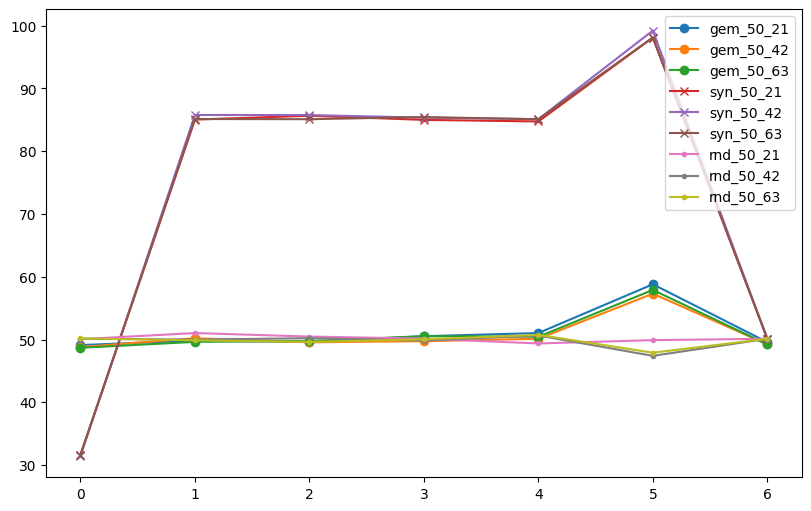

In [14]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

ax.plot(list(sprse_gem_50_21.values()), label='gem_50_21', marker='o')
ax.plot(list(sprse_gem_50_42.values()), label='gem_50_42', marker='o')
ax.plot(list(sprse_gem_50_63.values()), label='gem_50_63', marker='o')

ax.plot(list(sprse_syn_50_21.values()), label='syn_50_21', marker='x')
ax.plot(list(sprse_syn_50_42.values()), label='syn_50_42', marker='x')
ax.plot(list(sprse_syn_50_63.values()), label='syn_50_63', marker='x')

ax.plot(list(sprse_rnd_50_21.values()), label='rnd_50_21', marker='.')
ax.plot(list(sprse_rnd_50_42.values()), label='rnd_50_42', marker='.')
ax.plot(list(sprse_rnd_50_63.values()), label='rnd_50_63', marker='.')

ax.legend()
plt.show()

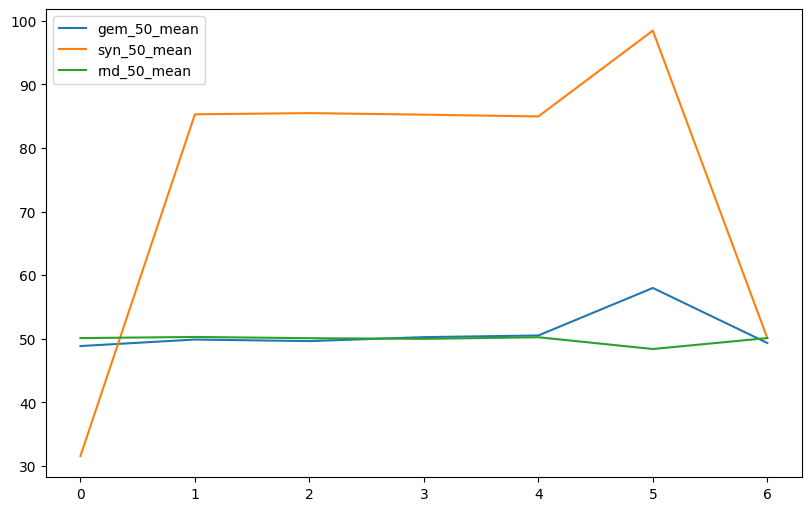

In [15]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

gem_mean = (np.array(list(sprse_gem_50_21.values())) + 
            np.array(list(sprse_gem_50_42.values())) +
            np.array(list(sprse_gem_50_63.values()))) / 3
ax.plot(gem_mean, label='gem_50_mean')

syn_mean = ( np.array(list(sprse_syn_50_21.values())) + np.array(list(sprse_syn_50_42.values())) + np.array(list(sprse_syn_50_63.values()))) / 3
ax.plot(syn_mean, label='syn_50_mean')

rnd_mean = ( np.array(list(sprse_rnd_50_21.values())) + np.array(list(sprse_rnd_50_42.values())) + np.array(list(sprse_rnd_50_63.values()))) / 3
ax.plot(rnd_mean, label='rnd_50_mean')

ax.legend()
plt.show()

### get units

In [16]:
gem_fil_50_21 = get_filters(gem_model_50_21)
gem_fil_50_42 = get_filters(gem_model_50_42)
gem_fil_50_63 = get_filters(gem_model_50_63)

In [17]:
syn_fil_50_21 = get_filters(syn_model_50_21)
syn_fil_50_42 = get_filters(syn_model_50_42)
syn_fil_50_63 = get_filters(syn_model_50_63)

In [18]:
rnd_fil_50_21 = get_filters(rnd_model_50_21)
rnd_fil_50_42 = get_filters(rnd_model_50_42)
rnd_fil_50_63 = get_filters(rnd_model_50_63)

### define distance measures

In [ ]:
def editDistanceSigns(a,b):
    nums = len(a) - len(np.intersect1d(np.where(b==0), np.where(a==0)))
    same = len(np.intersect1d(np.where(a<0), np.where(b<0))) + len(np.intersect1d(np.where(a>0), np.where(b>0)))
    if nums == 0:
        return 0
    return (nums-same)/nums

In [ ]:
# MAED 
def mean_absolute_error_distance(a,b):
    
    a_flat_sort = np.sort(a.flatten())
    b_flat_sort = np.flip(np.sort(b.flatten()))
    
    worst_alignment = sum(abs(a_flat_sort - b_flat_sort))

    dist = sum(abs(a - b).flatten()) / worst_alignment
    
    
    return dist

In [ ]:
test = order_by_dist(gem_fil_50_21, gem_fil_50_42, editDistanceSigns, fc=True)

### get all distances for unordered 

In [ ]:
fil_1 = gem_fil_50_21
fil_2 = gem_fil_50_42

all_dist_matrices_un = []

for x in range(len(fil_1)):
    new_mat = np.zeros((len(fil_1[x]), len(fil_2[x])), dtype=float)
    
    for i in range(len(fil_1[x])):
        for j in range(len(fil_2[x])):
            dist = 0

            dist = mean_absolute_error_distance(fil_1[x][i].flatten(),fil_2[x][j].flatten())

            new_mat[i][j] = dist
            
    all_dist_matrices_un.append(new_mat)

### get all distances for ordered 

In [ ]:
fil_1 = gem_fil_50_21
fil_2 = test

all_dist_matrices_or = []

for x in range(len(fil_1)):
    new_mat = np.zeros((len(fil_1[x]), len(fil_2[x])), dtype=float)
    
    for i in range(len(fil_1[x])):
        for j in range(len(fil_2[x])):
            dist = 0

            dist = mean_absolute_error_distance(fil_1[x][i].flatten(),fil_2[x][j].flatten())

            new_mat[i][j] = dist
            
    all_dist_matrices_or.append(new_mat)

### plot all distances

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(12,4))

counter = 0

all_dists = all_dist_matrices_un + all_dist_matrices_or

for ax in axs.flat:
    
    img = all_dists[counter]
    ax.imshow(img, cmap = "rainbow")
    diag_mean = sum(all_dists[counter].diagonal()) / (len(all_dists[counter].diagonal()))
    ax.set_title(f"layer {counter + 1 if counter < 6 else counter - 6 + 1} with dist {np.round(diag_mean, 2)}")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
        
    counter += 1


plt.tight_layout()
plt.show()

# after showing that it works now do for all interesting combinations
# maybe based on smallest dist to other methods 

In [ ]:
all_model_names =  ["gem_21", "gem_42", "gem_63",
                    "syn_21", "syn_42", "syn_63",
                    "rnd_21", "rnd_42", "rnd_63"]

all_models = [gem_fil_50_21, gem_fil_50_42, gem_fil_50_63,
              syn_fil_50_21, syn_fil_50_42, syn_fil_50_63,
              rnd_fil_50_21, rnd_fil_50_42, rnd_fil_50_63]

all_dist_matrices_mean = []
all_dist_combinations = []

for i in range(len(all_models)):
    for j in range(len(all_models)):
        if i != j:
            combi = all_model_names[i] + all_model_names[j]
            if combi not in all_dist_combinations:
                ordered_model = order_by_dist(all_models[i], all_models[j], mean_absolute_error_distance, fc = True)

                dist = mean_absolute_error_distance(all_models[i][x].flatten(),ordered_model[x].flatten())

                all_dist_matrices_mean.append([all_model_names[i] + all_model_names[j] , dist])
                all_dist_combinations.append(all_model_names[i] + all_model_names[j])
                all_dist_combinations.append(all_model_names[j] + all_model_names[i])
 
    

In [ ]:
value_list_mean = []
for dist in all_dist_matrices_mean:
    value_list_mean.append(dist[1])

new_mat_mean = np.zeros((9, 9), dtype=float)

value_list_mean = value_list_mean + value_list_mean
for i in range(new_mat_mean.shape[0]):
    for j in range(new_mat_mean.shape[1]):
    
        dist = value_list_mean[i + j]
        if i == j:
            dist = 0
        new_mat_mean[i][j] = dist

In [ ]:
fig, ax = plt.subplots()
img = ax.imshow(new_mat_mean, cmap = "rainbow")

ax.set_yticks(np.arange(0,9,1))
ax.tick_params(axis="y")#, rotation=45)
ax.set_yticklabels(all_model_names)

ax.set_xticks(np.arange(0,9,1))
ax.tick_params(axis="x", rotation=90)
ax.set_xticklabels(all_model_names)
fig.colorbar(img)
fig.show()

In [ ]:
all_model_names =  ["gem_21", "gem_42", "gem_63",
                    "syn_21", "syn_42", "syn_63",
                    "rnd_21", "rnd_42", "rnd_63"]

all_models = [gem_fil_50_21, gem_fil_50_42, gem_fil_50_63,
              syn_fil_50_21, syn_fil_50_42, syn_fil_50_63,
              rnd_fil_50_21, rnd_fil_50_42, rnd_fil_50_63]

all_dist_matrices_signs = []
all_dist_combinations = []

for i in range(len(all_models)):
    for j in range(len(all_models)):
        if i != j:
            combi = all_model_names[i] + all_model_names[j]
            if combi not in all_dist_combinations:
                ordered_model = order_by_dist(all_models[i], all_models[j], editDistanceSigns, fc = True)

                dist = editDistanceSigns(all_models[i][x].flatten(),ordered_model[x].flatten())

                all_dist_matrices_signs.append([all_model_names[i] + all_model_names[j] , dist])
                all_dist_combinations.append(all_model_names[i] + all_model_names[j])
                all_dist_combinations.append(all_model_names[j] + all_model_names[i])
 
    

In [ ]:
value_list_signs = []
for dist in all_dist_matrices_signs:
    value_list_signs.append(dist[1])

new_mat_signs = np.zeros((9, 9), dtype=float)

value_list_signs = value_list_signs + value_list_signs
for i in range(new_mat_signs.shape[0]):
    for j in range(new_mat_signs.shape[1]):
    
        dist = value_list_signs[i + j]
        if i == j:
            dist = 0
        new_mat_signs[i][j] = dist

In [ ]:
fig, ax = plt.subplots()
img = ax.imshow(new_mat_signs, cmap = "rainbow")

ax.set_yticks(np.arange(0,9,1))
ax.tick_params(axis="y")#, rotation=45)
ax.set_yticklabels(all_model_names)

ax.set_xticks(np.arange(0,9,1))
ax.tick_params(axis="x", rotation=90)
ax.set_xticklabels(all_model_names)
fig.colorbar(img)
fig.show()

In [ ]:
def getNormalizedEditDistance(a, b):

    # for two hidden neuron trees, return 1 if they are completely different, 0 if they are exactly the same
    if (len(a) == 0 and len(b) == 0):
        return 0
    intersect, inda, indb = np.intersect1d(a, b, return_indices=True)
    if (intersect.shape[0] > 0):
        edit = np.delete(a, inda).shape[0] + np.delete(b, indb).shape[0]
        normalizedEdit = edit / np.unique(np.concatenate((a, b), axis=0)).shape[0]
    else:
        normalizedEdit = 1
    return normalizedEdit

In [ ]:
all_model_names =  ["gem_21", "gem_42", "gem_63",
                    "syn_21", "syn_42", "syn_63",
                    "rnd_21", "rnd_42", "rnd_63"]

all_models = [gem_fil_50_21, gem_fil_50_42, gem_fil_50_63,
              syn_fil_50_21, syn_fil_50_42, syn_fil_50_63,
              rnd_fil_50_21, rnd_fil_50_42, rnd_fil_50_63]

all_dist_matrices_edit = []
all_dist_combinations = []

for i in range(len(all_models)):
    for j in range(len(all_models)):
        if i != j:
            combi = all_model_names[i] + all_model_names[j]
            if combi not in all_dist_combinations:
                ordered_model = order_by_dist(all_models[i], all_models[j], getNormalizedEditDistance, fc = True)

                dist = getNormalizedEditDistance(np.nonzero(all_models[i][x].flatten())[0],np.nonzero(ordered_model[x].flatten())[0])

                all_dist_matrices_edit.append([all_model_names[i] + all_model_names[j] , dist])
                all_dist_combinations.append(all_model_names[i] + all_model_names[j])
                all_dist_combinations.append(all_model_names[j] + all_model_names[i])
 
    

In [ ]:
value_list_edit = []
for dist in all_dist_matrices_edit:
    value_list_edit.append(dist[1])

new_mat_edit = np.zeros((9, 9), dtype=float)

value_list_edit = value_list_edit + value_list_edit
for i in range(new_mat_edit.shape[0]):
    for j in range(new_mat_edit.shape[1]):
    
        dist = value_list_edit[i + j]
        if i == j:
            dist = 0
        new_mat_edit[i][j] = dist

In [ ]:
fig, ax = plt.subplots()
img = ax.imshow(new_mat_edit, cmap = "rainbow")

ax.set_yticks(np.arange(0,9,1))
ax.tick_params(axis="y")#, rotation=45)
ax.set_yticklabels(all_model_names)

ax.set_xticks(np.arange(0,9,1))
ax.tick_params(axis="x", rotation=90)
ax.set_xticklabels(all_model_names)
fig.colorbar(img)
fig.show()

# semantic analysis

## load data set

In [19]:
batch_of_images_mnist = get_images_mnist(batch_size = 600)

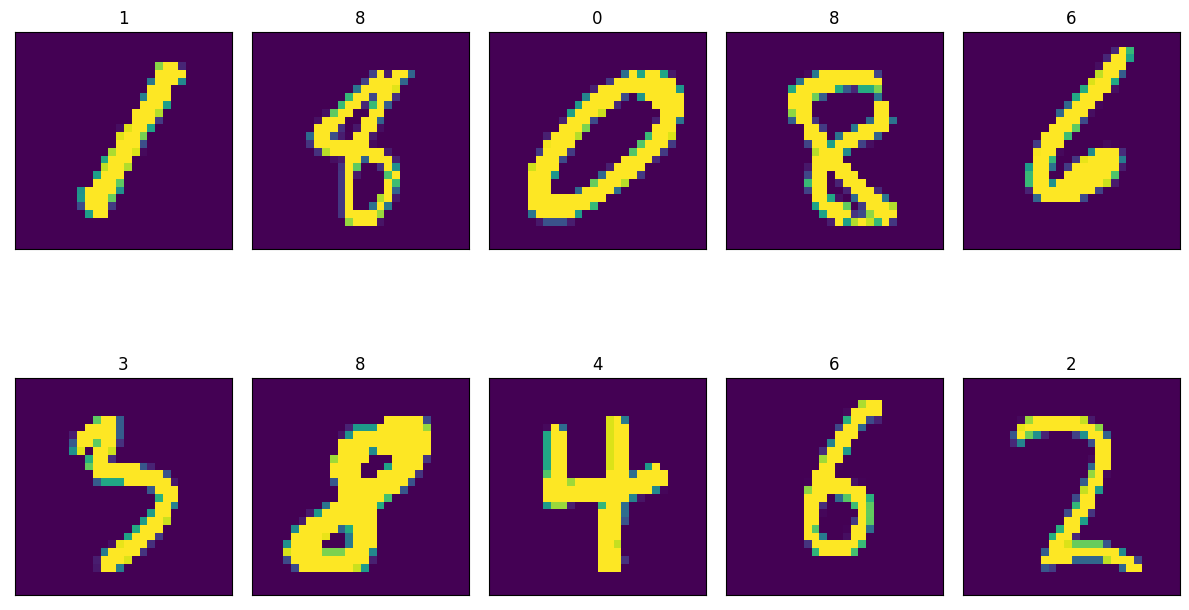

In [35]:
images_mnist, _ = batch_of_images_mnist.get_new_images(output = True)
batch_of_images_mnist.display((12,8), unique = 10)

## get activations over data from units

In [101]:
gem_fm_50_21 = get_activation_series(images_mnist, gem_fil_50_21, "all")
gem_fm_50_42 = get_activation_series(images_mnist, gem_fil_50_42, "all")
gem_fm_50_63 = get_activation_series(images_mnist, gem_fil_50_63, "all")


syn_fm_50_21 = get_activation_series(images_mnist, syn_fil_50_21, "all")
syn_fm_50_42 = get_activation_series(images_mnist, syn_fil_50_42, "all")
syn_fm_50_63 = get_activation_series(images_mnist, syn_fil_50_63, "all")


rnd_fm_50_21 = get_activation_series(images_mnist, rnd_fil_50_21, "all")
rnd_fm_50_42 = get_activation_series(images_mnist, rnd_fil_50_42, "all")
rnd_fm_50_63 = get_activation_series(images_mnist, rnd_fil_50_63, "all")

## get correlations of activations

In [102]:
gem_gem_21_42_cor = get_correlation(gem_fm_50_21, gem_fm_50_42)
gem_gem_21_63_cor = get_correlation(gem_fm_50_21, gem_fm_50_63)
gem_gem_42_63_cor = get_correlation(gem_fm_50_42, gem_fm_50_63)


syn_syn_21_42_cor = get_correlation(syn_fm_50_21, syn_fm_50_42)
syn_syn_21_63_cor = get_correlation(syn_fm_50_21, syn_fm_50_63)
syn_syn_42_63_cor = get_correlation(syn_fm_50_42, syn_fm_50_63)


rnd_rnd_21_42_cor = get_correlation(rnd_fm_50_21, rnd_fm_50_42)
rnd_rnd_21_63_cor = get_correlation(rnd_fm_50_21, rnd_fm_50_63)
rnd_rnd_42_63_cor = get_correlation(rnd_fm_50_42, rnd_fm_50_63)

## plot correlations

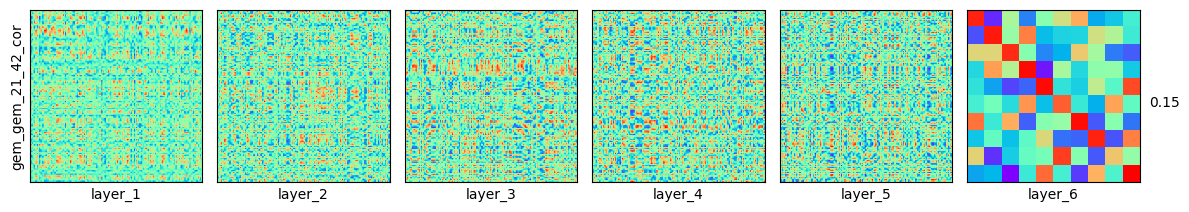

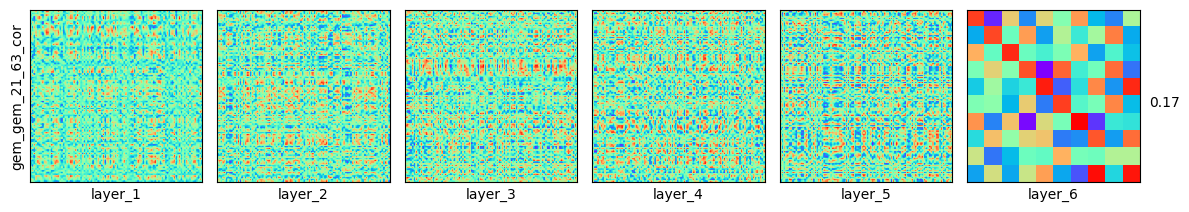

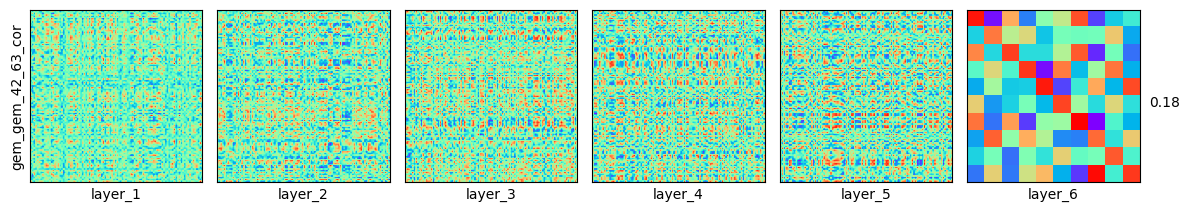

In [113]:
hm = [gem_gem_21_42_cor, gem_gem_21_63_cor, gem_gem_42_63_cor]
hm_names = ["gem_gem_21_42_cor", "gem_gem_21_63_cor", "gem_gem_42_63_cor"]

for i in range(3):
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12,8))
    counter = 0
    dist = 0
    for ax in axs.flat:
        img = hm[i][counter]
        ax.imshow(img, cmap = "rainbow")
        
        ax.set_xlabel(f"layer_{counter + 1}")
        if counter == 0:
            ax.set_ylabel(f"{hm_names[i]}")
            
        dist += sum(hm[i][counter].diagonal()) / (len(hm[i][counter].diagonal()))
        
        if counter == 5:
            dist = np.round(dist / 6, 2)
            
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f"{dist}", rotation=0, labelpad=18)

        ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        counter += 1

    plt.tight_layout()
    plt.show()

In [104]:
all_gem_gem_max_matched_matrices = []
all_gem_gem_semi_matched_matrices = []

hm = [gem_gem_21_42_cor, gem_gem_21_63_cor, gem_gem_42_63_cor]

the_end = []

for i in range(3):
    all_gem_gem_max_matched_matrices = []
    for j in range(6):
        
        gem_gem_match_semi_no_diag = find_semi_matching(hm[i][j])
        gem_gem_mat_semi = change_mat_semi(hm[i][j],gem_gem_match_semi_no_diag)

        all_gem_gem_semi_matched_matrices.append(gem_gem_mat_semi)

        gem_gem_match_max_no_diag = find_max_matching(hm[i][j])
        gem_gem_mat_max = change_mat_semi(hm[i][j],gem_gem_match_max_no_diag)

        all_gem_gem_max_matched_matrices.append(gem_gem_mat_max)
    the_end.append(all_gem_gem_max_matched_matrices)

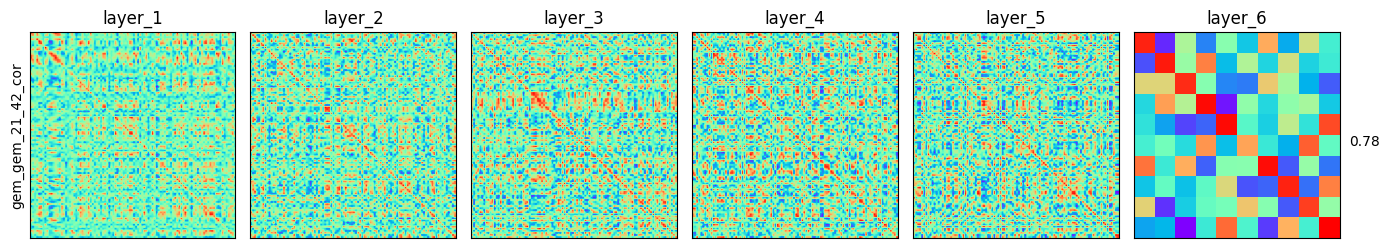

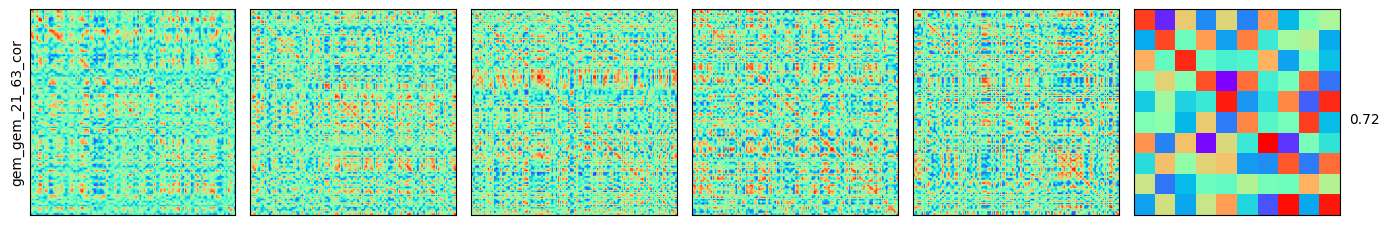

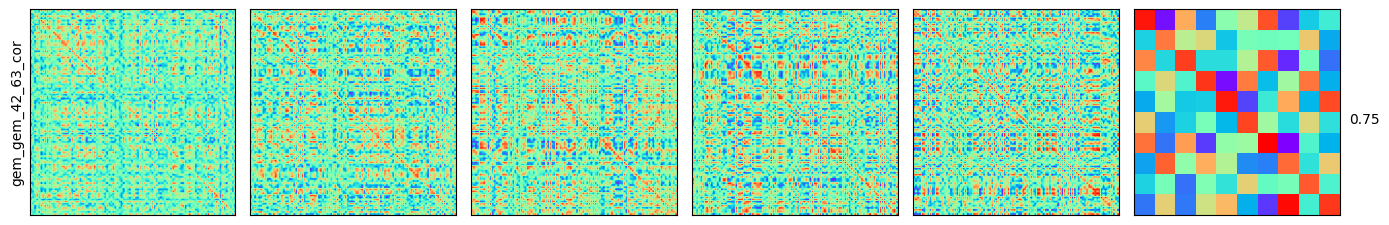

In [105]:
for i in range(3):
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(14,10))
    counter = 0
    dist = 0
    for ax in axs.flat:
        img = the_end[i][counter]
        ax.imshow(img, cmap = "rainbow")
        
        if i == 0:
            ax.set_title(f"layer_{counter + 1}")
        
        if counter == 0:
            ax.set_ylabel(f"{hm_names[i]}")
        
        dist += sum(the_end[i][counter].diagonal()) / (len(the_end[i][counter].diagonal()))
        
        if counter == 5:
            dist = np.round(dist / 6, 2)
            
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f"{dist}", rotation=0, labelpad=18)
        
        ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        counter += 1

    plt.tight_layout()
    plt.show()

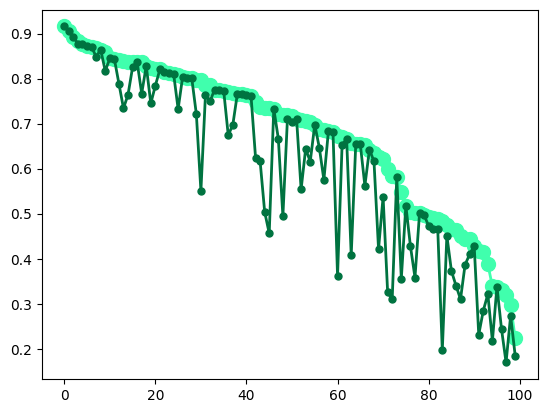

In [106]:
xcor = gem_gem_21_42_cor[0]
match = find_max_matching(gem_gem_21_42_cor[0])

match_vals = xcor[np.arange(xcor.shape[0]),match]
diag_order = (-xcor.max(1)).argsort()

hmax,= plt.plot(xcor[diag_order,:].max(1), 'o-', color=(.21/.84,.84/.84,.57/.84), lw=2, ms=10)
hmatch,= plt.plot(match_vals[diag_order], 'o-', color=(0,.45,.25), lw=2, ms=5)


plt.show()

In [107]:
all_syn_syn_max_matched_matrices = []
all_syn_syn_semi_matched_matrices = []

hm = [syn_syn_21_42_cor, syn_syn_21_63_cor, syn_syn_42_63_cor]

the_end = []

for i in range(3):
    all_syn_syn_max_matched_matrices = []
    for j in range(6):
        
        syn_syn_match_semi_no_diag = find_semi_matching(hm[i][j])
        syn_syn_mat_semi = change_mat_semi(hm[i][j],syn_syn_match_semi_no_diag)

        all_syn_syn_semi_matched_matrices.append(syn_syn_mat_semi)

        syn_syn_match_max_no_diag = find_max_matching(hm[i][j])
        syn_syn_mat_max = change_mat_semi(hm[i][j],syn_syn_match_max_no_diag)

        all_syn_syn_max_matched_matrices.append(syn_syn_mat_max)
    the_end.append(all_syn_syn_max_matched_matrices)

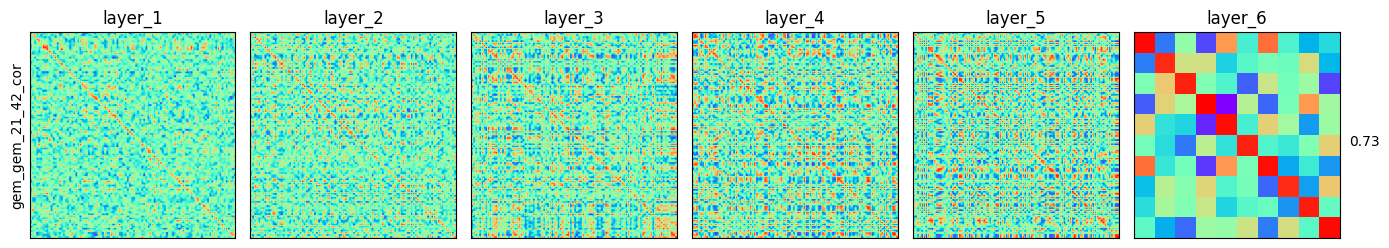

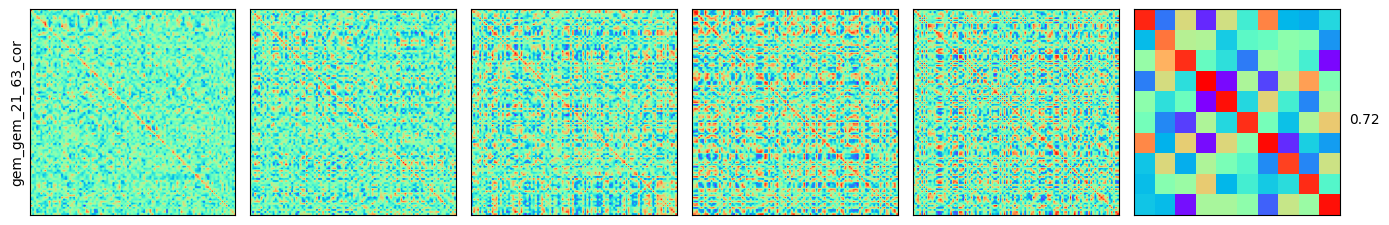

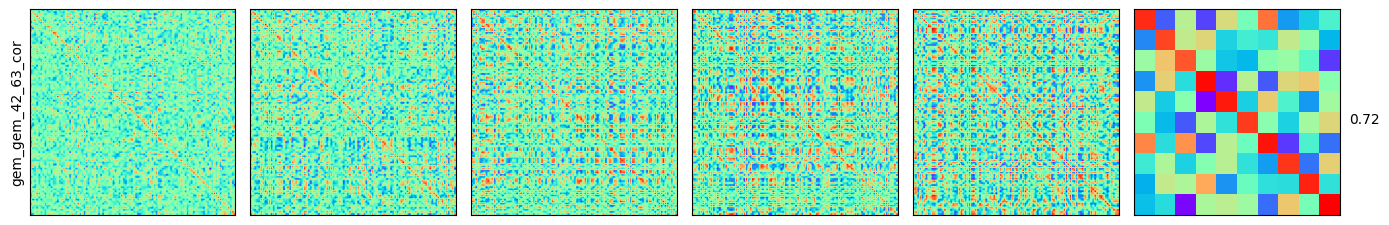

In [108]:
for i in range(3):
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(14,10))
    counter = 0
    dist = 0
    for ax in axs.flat:
        img = the_end[i][counter]
        ax.imshow(img, cmap = "rainbow")
        
        if i == 0:
            ax.set_title(f"layer_{counter + 1}")
        
        if counter == 0:
            ax.set_ylabel(f"{hm_names[i]}")
        
        dist += sum(the_end[i][counter].diagonal()) / (len(the_end[i][counter].diagonal()))
        
        if counter == 5:
            dist = np.round(dist / 6, 2)
            
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f"{dist}", rotation=0, labelpad=18)
        
        ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        counter += 1

    plt.tight_layout()
    plt.show()

In [109]:
all_rnd_rnd_max_matched_matrices = []
all_rnd_rnd_semi_matched_matrices = []

hm = [rnd_rnd_21_42_cor, rnd_rnd_21_63_cor, rnd_rnd_42_63_cor]

the_end = []

for i in range(3):
    all_rnd_rnd_max_matched_matrices = []
    for j in range(6):
        
        rnd_rnd_match_semi_no_diag = find_semi_matching(hm[i][j])
        rnd_rnd_mat_semi = change_mat_semi(hm[i][j],rnd_rnd_match_semi_no_diag)

        all_rnd_rnd_semi_matched_matrices.append(rnd_rnd_mat_semi)

        rnd_rnd_match_max_no_diag = find_max_matching(hm[i][j])
        rnd_rnd_mat_max = change_mat_semi(hm[i][j],rnd_rnd_match_max_no_diag)

        all_rnd_rnd_max_matched_matrices.append(rnd_rnd_mat_max)
    the_end.append(all_rnd_rnd_max_matched_matrices)

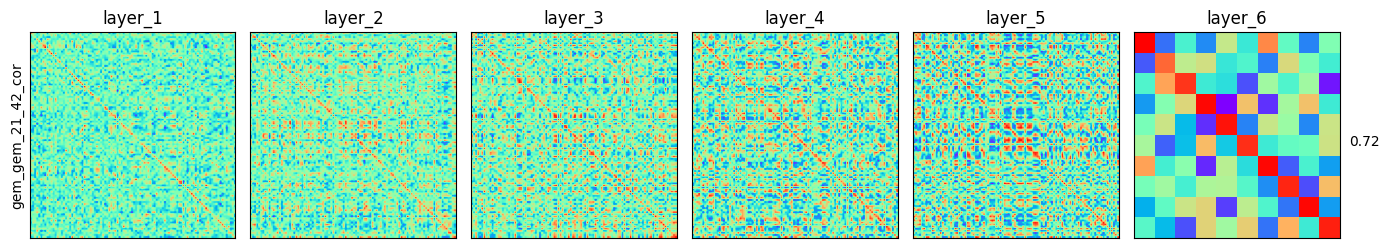

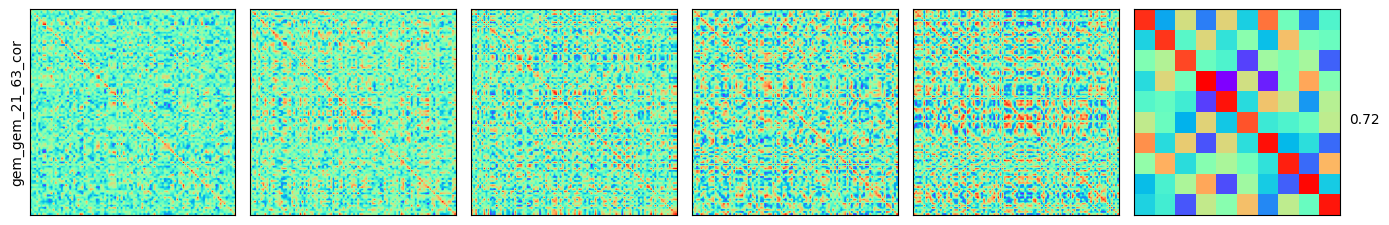

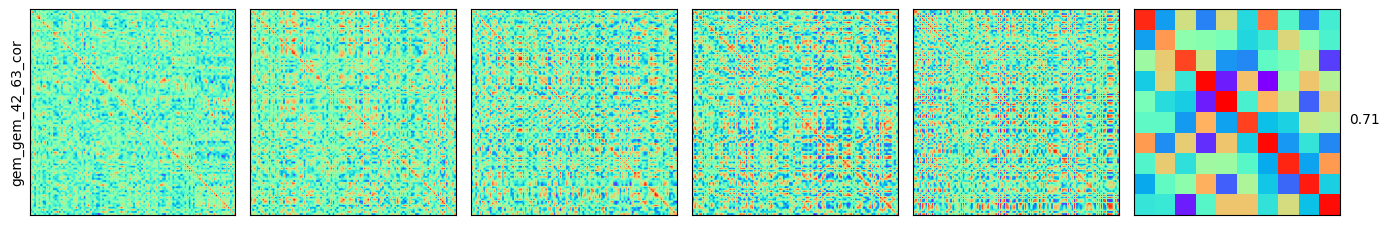

In [114]:
for i in range(3):
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(14,10))
    counter = 0
    dist = 0
    for ax in axs.flat:
        img = the_end[i][counter]
        ax.imshow(img, cmap = "rainbow")
        
        if i == 0:
            ax.set_title(f"layer_{counter + 1}")
        
        if counter == 0:
            ax.set_ylabel(f"{hm_names[i]}")
        
        dist += sum(the_end[i][counter].diagonal()) / (len(the_end[i][counter].diagonal()))
        
        if counter == 5:
            dist = np.round(dist / 6, 2)
            
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f"{dist}", rotation=0, labelpad=18)
        
        ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        counter += 1

    plt.tight_layout()
    plt.show()